In [1]:
import pandas  as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.datasets import make_biclusters
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors

In [24]:
dataset2 = pd.read_csv('genesDepressao.csv')
Y=dataset2.iloc[:,1:]
Y=Y.T

dataset = pd.read_csv('genesDepressaoNosLugaresDaDepressao.csv')
X=dataset.iloc[:,1:]
X=X.T #os lugares sao as linhas. (sao exemplares)

W=pd.concat([Y,X])


#ajeitando dimensoes
W=pd.DataFrame.drop_duplicates( W, keep=False)
print(Y.shape,X.shape,W.shape)

fill=652-189
print(fill)
fill = np.zeros((463, 419))
fill=pd.DataFrame(fill)

X=pd.concat([X,fill])
print(X.shape, W.shape)


demaisLugares=W.values
lugaresDepressao=X.values

     anterior orbital gyrus  anterior orbital gyrus.1  \
0                    0.4554                    0.8618   
1                  -11.9740                   -0.8763   
2                    0.3098                   -0.1078   
3                    0.6195                    0.7116   
4                    0.2383                   10.8990   
5                   11.2750                   -0.1507   
6                   36.7680                    0.2441   
7                   -0.6052                    0.2969   
8                   22.1910                   15.3010   
9                  -10.9860                   -0.4511   
10                  17.7290                    0.3507   
11                  -0.3591                   -0.6980   
12                   0.3284                   10.3450   
13                   0.7191                    0.9771   
14                   0.3979                    0.2349   
15                   0.0133                    0.7650   
16                   0.9572    

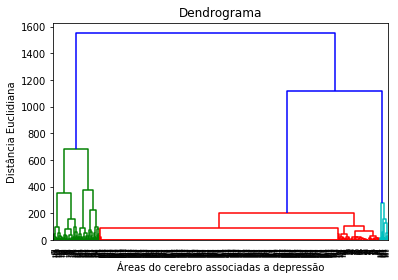

In [3]:
pca = PCA(2)
pca.fit(lugaresDepressao)
lugaresDepressao = pca.transform(lugaresDepressao)


# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(lugaresDepressao , method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Áreas do cerebro associadas a depressão')
plt.ylabel('Distância Euclidiana')
plt.show()

-----------------------------
### visualizando os clusters com agglomerativeClustering (não vai afetar valor):

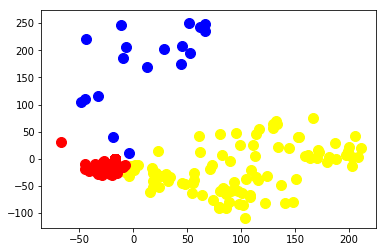

In [4]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = "cosine", linkage = 'average')
#hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(lugaresDepressao)
#print(X[y_hc == 0, 0])

# Visualising the clusters
plt.scatter(lugaresDepressao[y_hc == 0, 0], lugaresDepressao[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(lugaresDepressao[y_hc == 1, 0], lugaresDepressao[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(lugaresDepressao[y_hc == 2, 0], lugaresDepressao[y_hc == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')

### cada marcação / "bolinha" no plot acima representa um vetor de expressão genica de um lugar do cerebro

-------------------------------------------------------------------------------------------



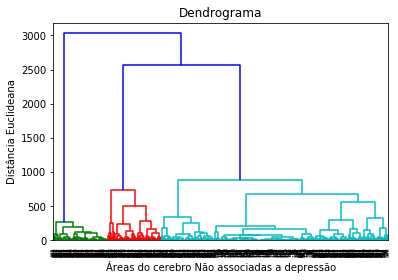

In [5]:
pca = PCA(2)
pca.fit(demaisLugares)
demaisLugares = pca.transform(demaisLugares)

# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(demaisLugares, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Áreas do cerebro Não associadas a depressão')
plt.ylabel('Distância Euclideana')
plt.show()


### visualizando os clusters com agglomerativeClustering (não vai afetar valor)

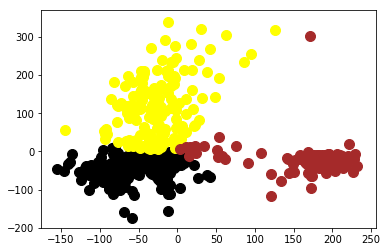

In [6]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = "cosine", linkage = 'average')
#linkage=average, affinity=cosine orrrrrrrrrr ward and euclidean
y_hc2 = hc2.fit_predict(demaisLugares)

plt.scatter(demaisLugares[y_hc2 == 0, 0], demaisLugares[y_hc2 == 0, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(demaisLugares[y_hc2 == 1, 0], demaisLugares[y_hc2 == 1, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(demaisLugares[y_hc2 == 2, 0], demaisLugares[y_hc2 == 2, 1], s = 100, c = 'brown', label = 'Cluster 6')

-----------------------------

### pegando os centroides e comparando com os demais locais cerebro:


In [20]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(lugaresDepressao)
centroids = kmeans.cluster_centers_
print(len(centroids))


#falta algo como centroids=centroids.fit(W) ja q o centroid vai ser tirado de X e vai ser buscado em W
neigh = NearestNeighbors(5).fit(demaisLugares) 
l=neigh.kneighbors(centroids, 5, return_distance=False)
print("\n\n\n indices desses vetores: \n\n", l,"\n\n")

3



 indices desses vetores: 

 [[516 285 180 513 379]
 [303 315 643 309 525]
 [444 440  53 401 436]] 




In [ ]:
plt.figure(figsize=(20, 20))
#plt.savefig('pic.png', dpi=80)

a=plt.scatter(demaisLugares[y_hc == 0, 0], demaisLugares[y_hc == 0, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(demaisLugares[y_hc == 1, 0], demaisLugares[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 5')
plt.scatter(demaisLugares[y_hc == 2, 0], demaisLugares[y_hc == 2, 1], s = 100, c = 'blue', label = 'Cluster 6')



b=plt.scatter(lugaresDepressao[y_hc == 0, 0], lugaresDepressao[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(lugaresDepressao[y_hc == 1, 0], lugaresDepressao[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(lugaresDepressao[y_hc == 2, 0], lugaresDepressao[y_hc == 2, 1], s = 100, c = 'red', label = 'Cluster 3')   



plt.scatter(centroids[0, 0],centroids[0, 1], s = 100, c = 'black', label = 'Cluster 1')
#plt.scatter(centroids[1, 0],centroids[1, 1], s = 100, c = 'green', label = 'Cluster 2')
#plt.scatter(centroids[2, 0],centroids[2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.tight_layout(pad=3)
plt.figlegend((a,b), ("Áreas do cerebro não associadas a depressão até o momento", "Áreas do cerebro já associadas a depressão"),
              loc='lower center',
              ncol=2, labelspacing=0.)

dataset = pd.read_csv('genesDepressaoNosLugaresDaDepressao.csv')
X=dataset.iloc[:,1:]

sns.clustermap(X,metric='cosine',  figsize=(5,5))

pca = PCA()
pca.fit(X)
X = pca.transform(X)
X=pd.DataFrame(X)
X=X.iloc[:,:7]

seed = 7
scoring = 'accuracy'

X = array[:,1:]
Y = array[:,0] 
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Make predictions on validation dataset

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(2*'\n')
print(confusion_matrix(Y_validation, predictions))
print(2*'\n')
print(classification_report(Y_validation, predictions))